In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [28]:
ls -alt ../*.xlsx

-rwxrwxrwx 1 ldhagen ldhagen  53587 Jul  7 16:36 '../Texas Hospital Capacity over Time by TSA Region.xlsx'*
-rwxrwxrwx 1 ldhagen ldhagen  30566 Jul  7 16:36 '../Texas COVID-19 Hospitalizations over Time by TSA Region.xlsx'*
-rwxrwxrwx 1 ldhagen ldhagen 127443 Jul  7 16:36 '../Cumulative Tests over Time by County.xlsx'*
-rwxrwxrwx 1 ldhagen ldhagen  82895 Jul  7 16:36 '../Texas COVID-19 Active Case Data by County.xlsx'*
-rwxrwxrwx 1 ldhagen ldhagen 113363 Jul  7 16:36 '../Texas COVID-19 Fatality Count Data by County.xlsx'*
-rwxrwxrwx 1 ldhagen ldhagen 138184 Jul  7 16:36 '../Texas COVID-19 Case Count Data by County.xlsx'*


In [29]:
df_Texas_Covid_case = pd.read_excel("../Texas COVID-19 Hospitalizations over Time by TSA Region.xlsx", header=2)

In [30]:
df_Texas_Covid_case.T.index

Index(['TSA ID', 'TSA AREA', '2020-04-12', '2020-04-13', '2020-04-14',
       '2020-04-15', '2020-04-16', '2020-04-17', '2020-04-18', '2020-04-19',
       '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24',
       '2020-04-25', '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
       '2020-04-30', '2020-05-01', '2020-05-02', '2020-05-03', '2020-05-04',
       '2020-05-05', '2020-05-06', '2020-05-07', '2020-05-08', '2020-05-09',
       '2020-05-10', '2020-05-11', '2020-05-12', '2020-05-13', '2020-05-14',
       '2020-05-15', '2020-05-16', '2020-05-17', '2020-05-18', '2020-05-19',
       '2020-05-20', '2020-05-21', '2020-05-22', '2020-05-23', '2020-05-24',
       '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28', '2020-05-29',
       '2020-05-30', '2020-05-31', '2020-06-01', '2020-06-02', '2020-06-03',
       '2020-06-04', '2020-06-05', '2020-06-06', '2020-06-07', '2020-06-08',
       '2020-06-09', '2020-06-10', '2020-06-11', '2020-06-12', '2020-06-13',
     

In [31]:
a = df_Texas_Covid_case.set_index('TSA AREA')

In [32]:
a.T['Statewide Total'][1:].index[0]

'2020-04-12'

In [33]:
count = 0
dated_dict = {}
for x in a.T['Statewide Total'][1:]:
#    print(a.T['Statewide Total'][1:].index[count], x)
    dated_dict[a.T['Statewide Total'][1:].index[count]] = x
    count += 1

In [34]:
dated_df = pd.DataFrame(dated_dict.items(), columns=['Date', 'Hospitalized'])

In [35]:
c = dated_df.set_index('Date')

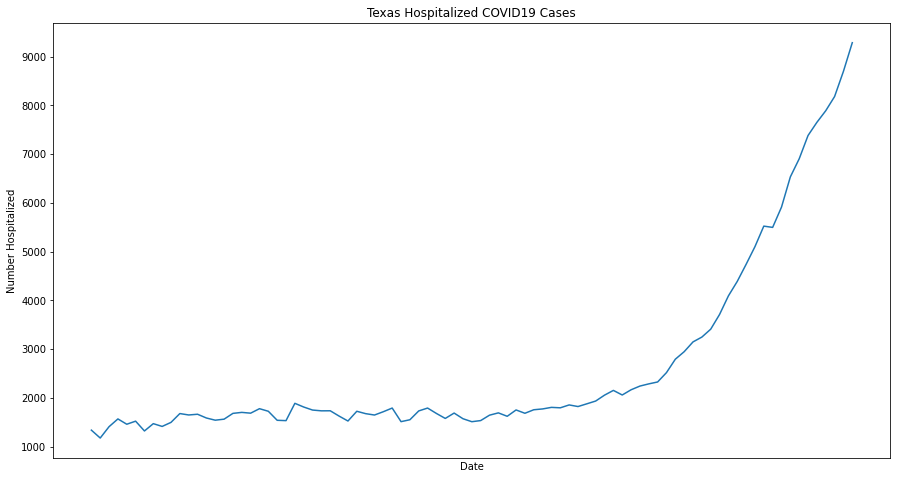

In [36]:
import datetime
import matplotlib.dates as mdates
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('Number Hospitalized',color='black')
plt.plot(c)
plt.title('Texas Hospitalized COVID19 Cases')
plt.savefig('Texas Hospitalized.png')

In [37]:
c

,Hospitalized
Date,
2020-04-12,1338
2020-04-13,1176
2020-04-14,1409
2020-04-15,1568
2020-04-16,1459
...,...
2020-07-03,7652
2020-07-04,7890
2020-07-05,8181


In [38]:
x = c.diff(periods = 1)

In [39]:
x.rename(columns={'Hospitalized':'Daily Change'}, inplace=True)

In [40]:
x_7day_moving= x.rolling(7).mean().shift()

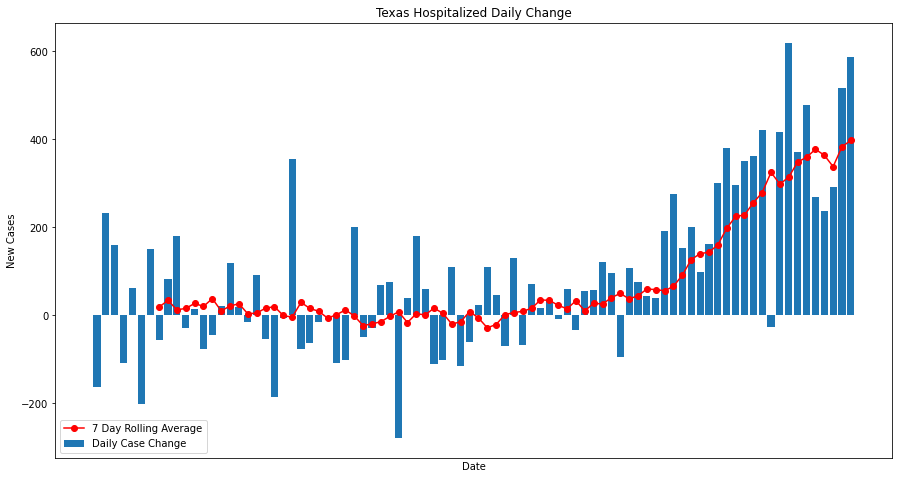

In [41]:
months = mdates.MonthLocator()
days = mdates.DayLocator()
timeFmt = mdates.DateFormatter('%b %Y')
fig, ax = plt.subplots()
fig.set_size_inches(15,8)
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(timeFmt)
ax.xaxis.set_minor_locator(days)
plt.xlabel('Date',color='black')
plt.ylabel('New Cases',color='black')
plt.title('Texas Hospitalized Daily Change')
plt.bar(x.index,x['Daily Change'])
plt.plot(x_7day_moving, 'ro-')
plt.legend(['7 Day Rolling Average','Daily Case Change'])
fig.savefig('TexasrHospChangeDaily.png')

In [42]:
x

,Daily Change
Date,
2020-04-12,NaN
2020-04-13,-162.0
2020-04-14,233.0
2020-04-15,159.0
2020-04-16,-109.0
...,...
2020-07-03,270.0
2020-07-04,238.0
2020-07-05,291.0


In [43]:
x[x['Daily Change'] > 515]


,Daily Change
Date,
2020-06-30,620.0
2020-07-06,517.0
2020-07-07,588.0
